In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

In [3]:
df = pd.read_csv("/home/bashar/Downloads/ML/insurance.csv")

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [6]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot: >

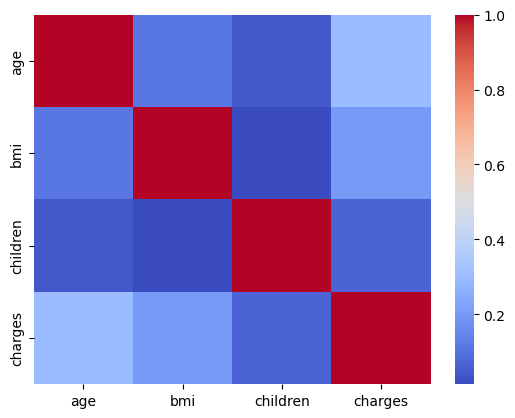

In [7]:
sns.heatmap(df.corr(), cmap = "coolwarm")

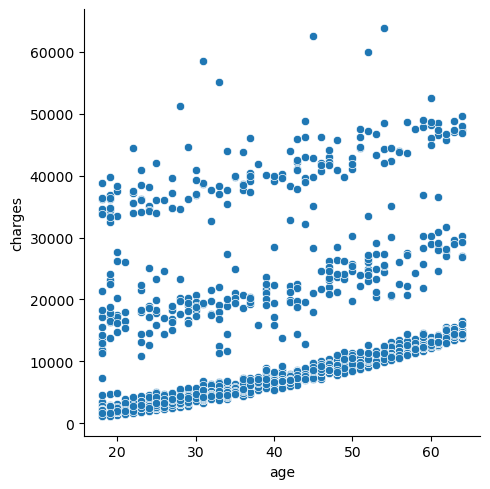

In [8]:
sns.relplot(data = df, x = "age", y = "charges")

In [9]:
hue_order=[df.age,df.smoker]

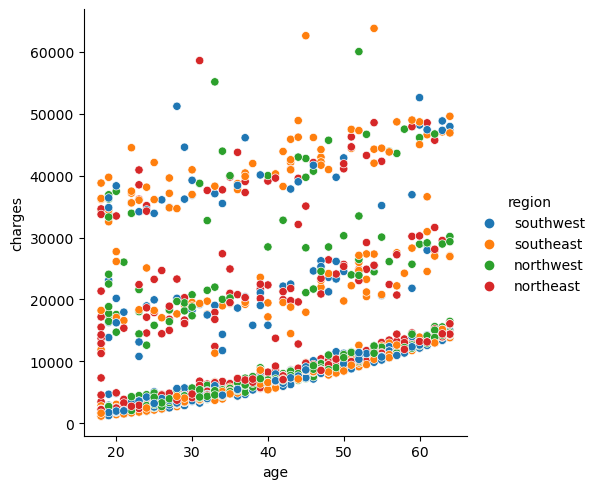

In [10]:
sns.relplot(data = df, x = "age", y = "charges", hue = "region")

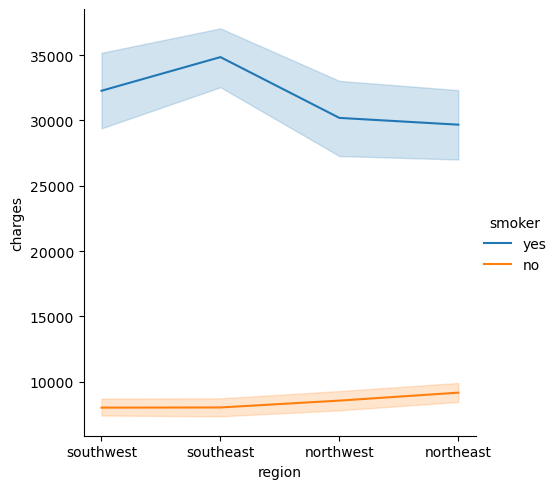

In [11]:
sns.relplot(data = df, x = "region", y = "charges", hue = "smoker", kind = "line")

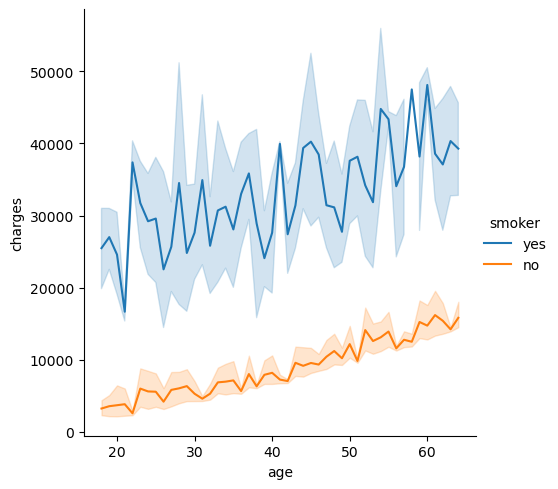

In [12]:
sns.relplot(data = df, x = "age", y = "charges", hue = "smoker", kind = "line")

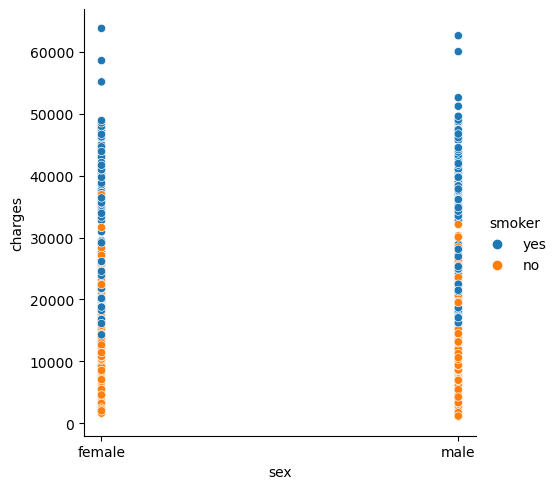

In [13]:
sns.relplot(data = df, x = "sex", y = "charges", hue = "smoker")

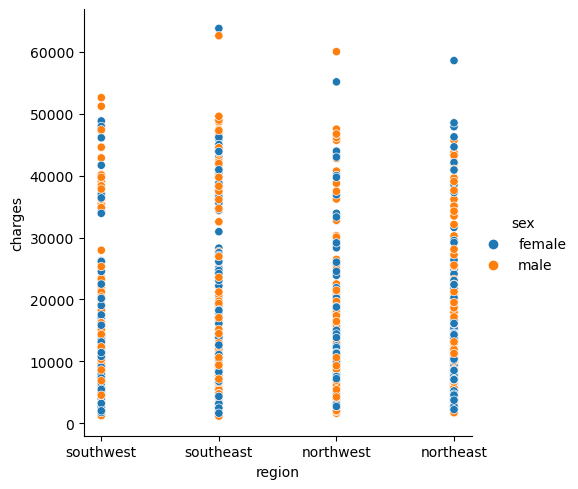

In [14]:
sns.relplot(data = df, x = "region", y = "charges", hue = "sex")

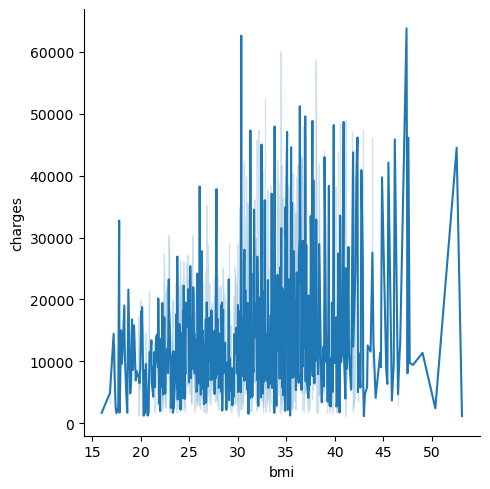

In [15]:
sns.relplot(data = df, x = "bmi", y = "charges", kind = "line")

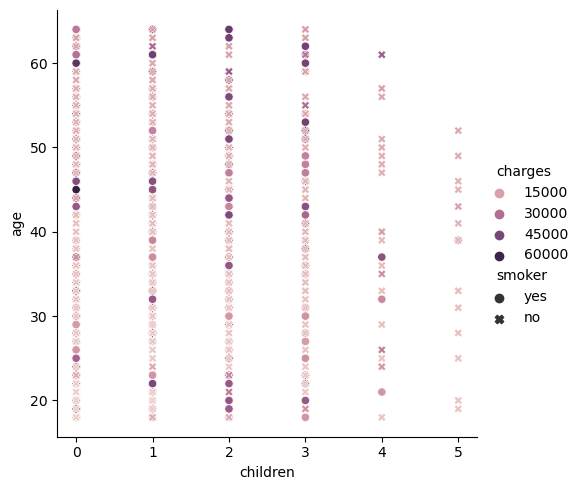

In [16]:
sns.relplot(data = df, x = "children", y = "age", hue = "charges",style='smoker')

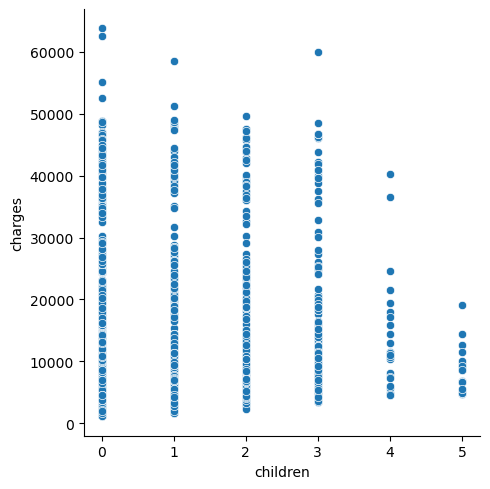

In [17]:
sns.relplot(data = df, x = "children", y = "charges")

In [18]:
conditions =[
    (df['smoker'] =='yes'),
    (df['smoker'] =='no'),
] 

choices = [1,0]
df['smoker_values'] = np.select(conditions, choices)

In [19]:
df

,age,sex,bmi,children,smoker,region,charges,smoker_values
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [20]:
x = df[['age','children','smoker_values']] #predictor
y = df[['charges']] #target
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.7, random_state = 5)

In [21]:
x_train.shape

(936, 3)

In [22]:
x_test.shape

(402, 3)

In [23]:
y_train.shape

(936, 1)

In [24]:
y_test.shape

(402, 1)

In [25]:
clf = LinearRegression()
clf.fit(x_train, y_train)

LinearRegression()

In [26]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse


In [27]:
y_pred = clf.predict(x_test)

In [28]:
r2_score(y_test, y_pred)

0.7274211255021412

In [29]:
print("MAE is: ", mae(y_test, y_pred))
print("MSE is: ", mse(y_test, y_pred))

MAE is:  4003.805414871996
MSE is:  38757618.19236799


In [30]:
x_test

,age,children,smoker_values
471,18,0,0
1250,24,0,1
1257,54,1,0
139,22,0,0
919,35,1,0
...,...,...,...
298,31,3,1
954,34,1,1
950,57,0,0
399,18,0,0


In [31]:
y_test

,charges
471,2203.47185
1250,18648.42170
1257,11305.93455
139,2166.73200
919,5245.22690
...,...
298,38746.35510
954,20009.63365
950,11534.87265
399,1631.66830


In [32]:
clf.predict(x_test.iloc[0].values.reshape(1,3))

/home/bashar/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1967.38606436]])

In [33]:
predicted = clf.predict(x_test)
expected = y_test

In [34]:
y_test

,charges
471,2203.47185
1250,18648.42170
1257,11305.93455
139,2166.73200
919,5245.22690
...,...
298,38746.35510
954,20009.63365
950,11534.87265
399,1631.66830


In [35]:
predicted

array([[ 1967.38606436],
       [27768.14376447],
       [12549.45312252],
       [ 3074.24798388],
       [ 7291.85900477],
       [33302.45336209],
       [10612.44476335],
       [12683.21076786],
       [ 4524.70420596],
       [11652.4278602 ],
       [14142.86717913],
       [12482.57429984],
       [ 1967.38606436],
       [10268.85046079],
       [ 9992.13498091],
       [ 8188.88426709],
       [33989.64196719],
       [11165.87572311],
       [13647.11485285],
       [ 8122.00544442],
       [29075.64215201],
       [ 2864.41132667],
       [ 2244.10154424],
       [ 5011.25634305],
       [ 5078.13516572],
       [ 7291.85900477],
       [36346.32364078],
       [14696.29813889],
       [13866.15169925],
       [14419.58265901],
       [ 9228.86736394],
       [ 2244.10154424],
       [ 4038.15206887],
       [10268.85046079],
       [34409.31528161],
       [ 1967.38606436],
       [ 7358.73782744],
       [ 2797.532504  ],
       [ 5421.72946828],
       [ 5078.13516572],


In [36]:
expected.head()

,charges
471,2203.47185
1250,18648.42170
1257,11305.93455
139,2166.73200
919,5245.22690


In [42]:
predicted.shape

(402, 1)

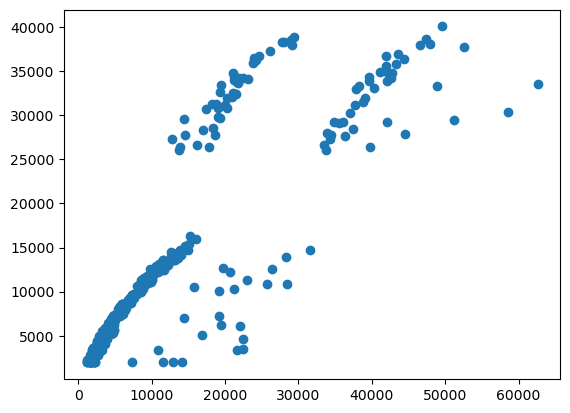

In [45]:
x = y_test
y = predicted
plt.scatter(x,y)

ValueError: x and y must be the same size

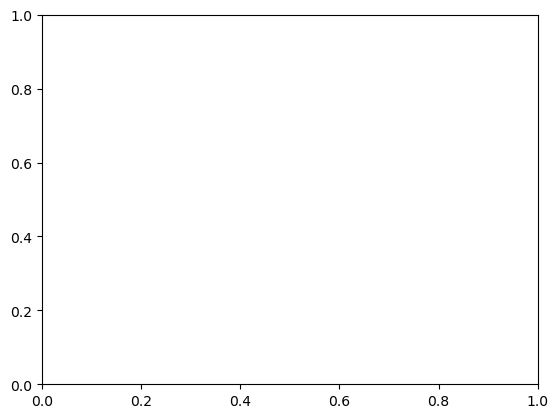

In [37]:

# Create plot

fig, ax = plt.scatter(x,y)
ax.scatter(y_test, label='y_test')
ax.scatter(predicted, label='predicted')

# Show plot
plt.show()


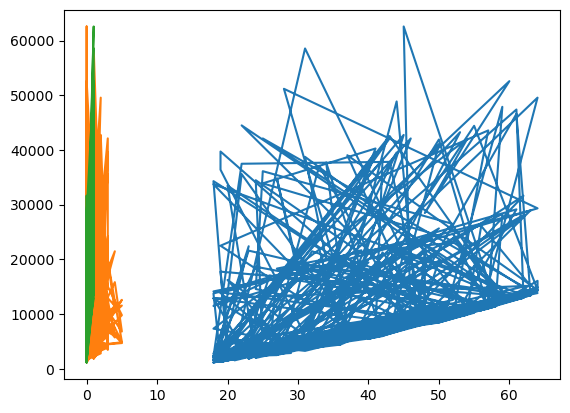

In [43]:
plt.plot(x_test, y_test, label='Actual')
plt.show()